# Orders

✏️ **Exercise**

Today, we will investigate the **orders**, and their associated **review score**.

👉 Our goal is to create a DataFrame with the following features:


| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `order_id` 	| str 	| the id of the order 	|
| `wait_time` 	| float 	| the number of days between order_date and delivered_date 	|
| `expected_wait_time` 	| float 	| the number of days between order_date and estimated_delivery_date 	|
| `delay_vs_expected` 	| float 	| if the actual delivery date is later than the estimated delivery date, returns the number of days between the two dates, otherwise return 0 	|
| `order_status` 	| str 	| the status of the order 	|
| `dim_is_five_star` 	| int 	| 1 if the order received a five-star review, 0 otherwise 	|
| `dim_is_one_star` 	| int 	| 1 if the order received a one_star, 0 otherwise 	|
| `review_score` 	| int 	| from 1 to 5 	|
| `number_of_products` 	| int 	| number of products that the order contains 	|
| `number_of_sellers` 	| int 	| number of sellers involved in the order 	|
| `price` 	| float 	| total price of the order paid by customer 	|
| `freight_value` 	| float 	| value of the freight paid by customer 	|
| `distance_customer_seller` 	| float 	| the distance in km between customer and seller (optional) 	|  
  
⚠️ We also want to filter out "non-delivered" orders, unless explicitly specified, otherwise we cannot compute the potential delays.

❓ **Your challenge**: 

- Implement each feature as a separate method within the `Order` class available at `olist/order.py`
- Then, create a method `get_training_data()` that returns the complete DataFrame.

In [1]:
# Auto reload imported module everytime a jupyter cell is executed (handy for olist.order.py updates)
%load_ext autoreload
%autoreload 2

In [2]:
# Import usual modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
# Import olist data
from olist.data import Olist
olist = Olist()
data = olist.get_data()

In [4]:
# What datasets do we have access to now ? 
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [5]:
wait_time = data['orders'].copy() # good practice to be sure not to modify your `data` variable

assert(wait_time.shape == (99441, 8))

## 1. Code `order.py`

### a) `get_wait_time`
    ❓ Return a Dataframe with:
           order_id, wait_time, expected_wait_time, delay_vs_expected, order_status


pseudo-code 👇 for this first method:

> 1. Inspect the `orders` dataframe
2. Filter the dataframe on `delivered orders`
3. Handle `datetime`
    - Take time to understand what python [`datetime`](https://docs.python.org/3/library/datetime.html) objects are
    - and convert dates from "string" type to "pandas.datetime' using [`pandas.to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
4. Compute `wait_time`
5. Compute `expected_wait_time`
6. Compute `delay_vs_expected`
7. Check the new dataframe 
8. Once you are satisfied with your code, you can carefully copy-paste it from the notebook to to `olist/order.py`

In [6]:
wait_time = wait_time.query("order_status == 'delivered'")
wait_time.shape

(96478, 8)

In [7]:
# handle datetime
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']: 
    wait_time[col] = pd.to_datetime(wait_time[col])

In [8]:
wait_time['wait_time'] = (wait_time['order_delivered_carrier_date'] - wait_time['order_approved_at']) / pd.to_timedelta(1, unit='D')
wait_time['expected_wait_time'] = (wait_time['order_estimated_delivery_date'] - wait_time['order_approved_at']) / pd.to_timedelta(1, unit='D')
wait_time['delay_vs_expected'] = wait_time['wait_time'] - wait_time['expected_wait_time']
wait_time['delay_vs_expected'] = wait_time['delay_vs_expected'].apply(lambda x: x if x > 0 else 0)
wait_time.drop(columns=['customer_id', 'order_purchase_timestamp',	'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🧪 Now, test it by running the following cell 👇 

In [9]:
# Test your code here
from olist.order import Order
Order().get_wait_time()

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered
99437,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered
99438,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered
99439,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered


In [10]:
from nbresult import ChallengeResult
result = ChallengeResult('wait_time', shape=Order().get_wait_time().shape)
result.write(); print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/christianklaus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/christianklaus/code/christianklausML/olist_data_analysis/02-Statistical-Inference/01-Orders
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_wait_time.py::TestWaitTime::test_wait_time PASSED             [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/wait_time.pickle

git commit -m 'Completed wait_time step'

git push origin master


### b) `get_review_score`
     ❓ Returns a DataFrame with:
        order_id, dim_is_five_star, dim_is_one_star, review_score

dim_is_$N$_star should contain `1` if review_score=$N$ and `0` otherwise 

👉 We load the `reviews`

In [24]:
reviews = data['order_reviews'].copy()
assert(reviews.shape == (99224,7))
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [29]:
dim_is_one_star = lambda x: int(x==1)
dim_is_five_star = lambda x: int(x==5)

reviews["dim_is_five_star"] = reviews["review_score"].map(dim_is_five_star) # --> Series([0, 1, 1, 0, 0, 1 ...])
reviews["dim_is_one_star"] = reviews["review_score"].map(dim_is_one_star) # --> Series([0, 1, 1, 0, 0, 1 ...])

Once again, 

👀 Check the dataframe you've just created. <br/> 

💪 When your code works, commit it to `olist/order.py` <br/>

🧪 Now, test it by running the following cell 👇 

In [30]:
reviews[["order_id", "dim_is_five_star", "dim_is_one_star", "review_score"]]

,order_id,dim_is_five_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,5
3,658677c97b385a9be170737859d3511b,1,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,5
...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,0,4


In [27]:
# Test your code here
from olist.order import Order
Order().get_review_score()

,order_id,dim_is_five_star,dim_is_four_star,dim_is_three_star,dim_is_two_star,dim_is_one_star,review_score
0,73fc7af87114b39712e6da79b0a377eb,0,1,0,0,0,4
1,a548910a1c6147796b98fdf73dbeba33,1,0,0,0,0,5
2,f9e4b658b201a9f2ecdecbb34bed034b,1,0,0,0,0,5
3,658677c97b385a9be170737859d3511b,1,0,0,0,0,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,1,0,0,0,0,5
...,...,...,...,...,...,...,...
99219,2a8c23fee101d4d5662fa670396eb8da,1,0,0,0,0,5
99220,22ec9f0669f784db00fa86d035cf8602,1,0,0,0,0,5
99221,55d4004744368f5571d1f590031933e4,1,0,0,0,0,5
99222,7725825d039fc1f0ceb7635e3f7d9206,0,1,0,0,0,4


### c) `get_number_products`:
     ❓ Returns a DataFrame with:
        order_id, number_of_products (total number of products per order)

In [32]:
order_items = data['order_items'].copy()
number_of_products = order_items[['order_id', 'product_id']].groupby(by='order_id').count()
number_of_products.reset_index(inplace = True)
number_of_products.rename(columns = {'product_id': 'number_of_products'}, inplace=True)

🧪 Same routine: 
* check your dataframe, 
* commit your code to `olist/order.py`
* and check that it truly works.

In [33]:
# Test your code here
from olist.order import Order
Order().get_number_products()

,order_id,number_of_products
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,1
98662,fffcd46ef2263f404302a634eb57f7eb,1
98663,fffce4705a9662cd70adb13d4a31832d,1
98664,fffe18544ffabc95dfada21779c9644f,1


In [34]:
from nbresult import ChallengeResult
result = ChallengeResult('number_products', shape=Order().get_number_products().shape)
result.write(); print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/christianklaus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/christianklaus/code/christianklausML/olist_data_analysis/02-Statistical-Inference/01-Orders
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_number_products.py::TestNumberProducts::test_review_score PASSED [100%]

============================== 1 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/number_products.pickle

git commit -m 'Completed number_products step'

git push origin master


### d) `get_number_sellers`:
     ❓ Returns a DataFrame with:
        order_id, number_of_sellers (total number of unique sellers per order)

In [35]:
number_sellers = data['order_items'].copy()
number_sellers = number_sellers[['order_id', 'seller_id']].groupby(by='order_id').nunique()
number_sellers.reset_index(inplace = True)
number_sellers.rename(columns = {'seller_id': 'number_of_sellers'}, inplace=True)

In [36]:
from nbresult import ChallengeResult
result = ChallengeResult('number_sellers', shape=Order().get_number_sellers().shape)
result.write(); print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/christianklaus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/christianklaus/code/christianklausML/olist_data_analysis/02-Statistical-Inference/01-Orders
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_number_sellers.py::TestNumberSellers::test_number_seller PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/number_sellers.pickle

git commit -m 'Completed number_sellers step'

git push origin master


### e) `get_price_and_freight`
     Returns a DataFrame with:
        order_id, price, freight_value

In [37]:
price_and_freight = data['order_items'].copy()
price_and_freight = price_and_freight[['order_id', 'price', 'freight_value']].groupby(by='order_id').sum()
price_and_freight.reset_index(inplace = True)

In [38]:
from nbresult import ChallengeResult
result = ChallengeResult('price', shape=Order().get_price_and_freight().shape)
result.write(); print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/christianklaus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/christianklaus/code/christianklausML/olist_data_analysis/02-Statistical-Inference/01-Orders
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_price.py::TestPrice::test_price PASSED                        [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/price.pickle

git commit -m 'Completed price step'

git push origin master


### e) `get_distance_seller_customer` 

    ❓ Returns a Dataframe with:
        order_id, distance_seller_customer (the distance in km between customer and seller)

💡Have a look at the `haversine_distance` formula in the `olist.utils` module

In [39]:
matching_geo = Order().get_distance_seller_customer()

👉 Let's quickly check the distribution of the distance seller-customer :)

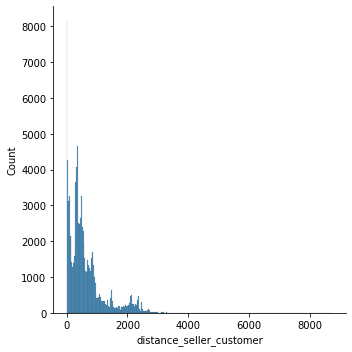

In [40]:
sns.displot(data = matching_geo, x ='distance_seller_customer')

👉 What is the median seller-customer distance ?

In [42]:
matching_geo['distance_seller_customer'].describe()

count    98177.000000
mean       601.961534
std        596.877838
min          0.000000
25%        186.380313
50%        433.698770
75%        798.435455
max       8736.947618
Name: distance_seller_customer, dtype: float64

⚠️ Since an order can have multiple sellers, inspect the average seller-customer distance per order.

In [43]:
average_order_distance = matching_geo.groupby("order_id", as_index=False).agg(
    {"distance_seller_customer": "mean"}
)
average_order_distance

,order_id,distance_seller_customer
0,00010242fe8c5a6d1ba2dd792cb16214,301.005664
1,00018f77f2f0320c557190d7a144bdd3,589.274140
2,000229ec398224ef6ca0657da4fc703e,312.495046
3,00024acbcdf0a6daa1e931b038114c75,301.951753
4,00042b26cf59d7ce69dfabb4e55b4fd9,646.221788
...,...,...
98172,fffc94f6ce00a00581880bf54a75a037,2755.314485
98173,fffcd46ef2263f404302a634eb57f7eb,354.848852
98174,fffce4705a9662cd70adb13d4a31832d,338.827218
98175,fffe18544ffabc95dfada21779c9644f,72.870476


In [44]:
average_order_distance.describe()

,distance_seller_customer
count,98177.000000
mean,601.961534
std,596.877838
min,0.000000
25%,186.380313
50%,433.698770
75%,798.435455
max,8736.947618


👀 Check your new dataframe and commit your code to olist/order.py when it works. 

In [45]:
Order().get_distance_seller_customer()['distance_seller_customer']

0         301.005664
1         589.274140
2         312.495046
3         301.951753
4         646.221788
            ...     
98172    2755.314485
98173     354.848852
98174     338.827218
98175      72.870476
98176     133.230980
Name: distance_seller_customer, Length: 98177, dtype: float64

🧪  Test your code

In [46]:
from nbresult import ChallengeResult

result = ChallengeResult('distance',
    mean = Order().get_distance_seller_customer()['distance_seller_customer'].mean())
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/christianklaus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/christianklaus/code/christianklausML/olist_data_analysis/02-Statistical-Inference/01-Orders
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_distance.py::TestDistance::test_distance PASSED               [100%]

============================== 1 passed in 0.30s ===============================


💯 You can commit your code:

git add tests/distance.pickle

git commit -m 'Completed distance step'

git push origin master


## 2. All at once: `get_training_data`

❓ Time to code `get_training_data` making use of your previous coded methods, to gather all order features in one table

In [47]:
data_frames = [Order().get_wait_time(), Order().get_review_score(), Order().get_number_products(), Order().get_number_sellers(), Order().get_price_and_freight()]

In [48]:
training_data = reduce(lambda  left,right: pd.merge(left,right,on=['order_id'],
                                            how='inner'), data_frames)
training_data.dropna(inplace=True)
training_data

,order_id,wait_time,expected_wait_time,delay_vs_expected,order_status,dim_is_five_star,dim_is_four_star,dim_is_three_star,dim_is_two_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,8.436574,15.544063,0.0,delivered,0,1,0,0,0,4,1,1,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,13.782037,19.137766,0.0,delivered,0,1,0,0,0,4,1,1,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,9.394213,26.639711,0.0,delivered,1,0,0,0,0,5,1,1,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,13.208750,26.188819,0.0,delivered,1,0,0,0,0,5,1,1,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,2.873877,12.112049,0.0,delivered,1,0,0,0,0,5,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,8.218009,18.587442,0.0,delivered,1,0,0,0,0,5,1,1,72.00,13.08
96357,63943bddc261676b46f01ca7ac2f7bd8,22.193727,23.459051,0.0,delivered,0,1,0,0,0,4,1,1,174.90,20.10
96358,83c1379a015df1e13d02aae0204711ab,24.859421,30.384225,0.0,delivered,1,0,0,0,0,5,1,1,205.99,65.02
96359,11c177c8e97725db2631073c19f07b62,17.086424,37.105243,0.0,delivered,0,0,0,1,0,2,2,1,359.98,81.18


🧪  Test it below

In [49]:
from nbresult import ChallengeResult
from olist.order import Order
data = Order().get_training_data()

result = ChallengeResult('training',
    shape=data.shape,
    columns=sorted(list(data.columns))
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/christianklaus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/christianklaus/code/christianklausML/olist_data_analysis/02-Statistical-Inference/01-Orders
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_training.py::TestTraining::test_training_data_columns FAILED  [ 50%]
tests/test_training.py::TestTraining::test_training_data_shape FAILED    [100%]

=================================== FAILURES ===================================
___________________ TestTraining.test_training_data_columns ____________________

self = <tests.test_training.TestTraining testMethod=test_training_data_columns>

    def test_training_data_columns(self):
        columns = ['delay_vs_expected',
                   'dim_is_five_star',
                   'dim_is_one_star',
                   'expected_wait_t